# Simple How-to Explaining Phantoms

Demonstrate simple basic custom phantom and sinogram generation with XDesign.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from xdesign import *

###################|###################|###################|###################|

## Phantom creation

Create various `Phantoms` each with unique geometry. Make non-convex polygons by meshing together convex polygons.

In [14]:
# Make a circle with a triangle cut out
m = Mesh()
m.append(Circle(Point([0.0, 0.0]), radius=0.5))
m.append(-Triangle(Point([-0.3, -0.2]),
                   Point([0.0, -0.3]),
                   Point([0.3, -0.2])))


head = Phantom(geometry=m)

# Make two eyes separately
eyeL = Phantom(geometry=Circle(Point([-0.2, 0.0]), radius=0.1))
eyeR = Phantom(geometry=Circle(Point([0.2, 0.0]), radius=0.1))

Define materials to use in the phantom. Assigning multiple phantoms the same material saves memory.

In [15]:
material = SimpleMaterial(mass_attenuation=1.0)

head.material = material
eyeL.material = material
eyeR.material = material

Collect the phantoms together by making the eyes and mouth children of the head `Phantom`.

In [16]:
head.append(eyeL)
head.append(eyeR)

print(repr(head))

Phantom(geometry=Mesh(faces=[Circle(center=Point([0.0, 0.0]), radius=0.5, sign=1), Triangle(Point([-0.29999999999999999, -0.20000000000000001]), Point([0.0, -0.29999999999999999]), Point([0.29999999999999999, -0.20000000000000001]))]), children=[Phantom(geometry=Circle(center=Point([-0.20000000000000001, 0.0]), radius=0.1, sign=1), children=[], material=SimpleMaterial(mass_attenuation=1.0)), Phantom(geometry=Circle(center=Point([0.20000000000000001, 0.0]), radius=0.1, sign=1), children=[], material=SimpleMaterial(mass_attenuation=1.0))], material=SimpleMaterial(mass_attenuation=1.0))


/home/beams0/B242827/Documents/xdesign/xdesign/geometry.py:1295: UserWarning: Didn't check that Mesh contains Circle.
  warnings.warn("Didn't check that Mesh contains Circle.")


## Viewing phantom geometry and properties

Plot the `Phantom` geometry and properties with a colorbar.

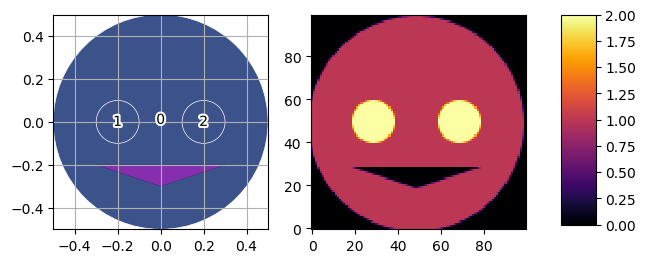

In [18]:
fig = plt.figure(figsize=(7, 3), dpi=100)

# plot geometry
axis = fig.add_subplot(121, aspect='equal')
plt.grid('on')
plot_phantom(head, axis=axis, labels=False)
plt.xlim([-.5, .5])
plt.ylim([-.5, .5])

# plot property
plt.subplot(1, 2, 2)
im = plt.imshow(discrete_phantom(head, 100, prop='mass_attenuation'),
                interpolation='none', cmap=plt.cm.inferno, origin='lower')

# plot colorbar
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.16, 0.05, 0.7])
fig.colorbar(im, cax=cbar_ax)

# save the figure
plt.savefig('Shepp_sidebyside.png', dpi=600,
        orientation='landscape', papertype=None, format=None,
        transparent=True, bbox_inches='tight', pad_inches=0.0,
        frameon=False)
plt.show()

## Simulate data acquisition

Simulate data acquisition for parallel beam around 180 degrees.

In [19]:
NPIXEL = 100
theta, h = np.meshgrid(np.linspace(0, np.pi, NPIXEL, endpoint=False),
                       np.linspace(0, 1, NPIXEL, endpoint=False) - 0.5 + 1/NPIXEL/2)
theta = theta.flatten()
h = h.flatten()
v = h*0

In [20]:
probe = Probe(size=1/NPIXEL)

In [21]:
sino = probe.measure(head, theta, h, v)
sino = -np.log(sino)

/home/beams0/B242827/Documents/xdesign/xdesign/geometry.py:1391: RuntimeWarning: halfspacecirc was out of bounds, -1.6769698407692601e-09
  RuntimeWarning)


Plot the sinogram.

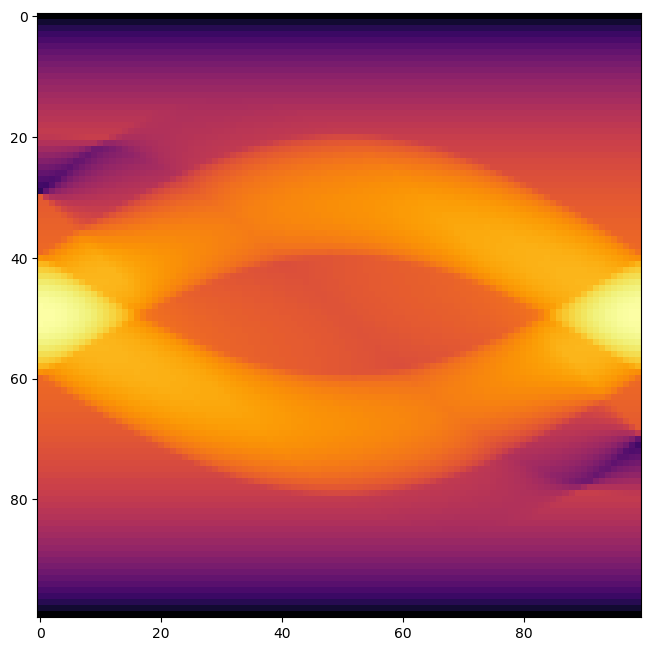

In [22]:
plt.figure(figsize=(8, 8), dpi=100)
plt.imshow(np.reshape(sino, (sx, sy)), cmap='inferno',
           interpolation='nearest')
plt.savefig('Shepp_sinogram.png', dpi=600,
        orientation='landscape', papertype=None, format=None,
        transparent=True, bbox_inches='tight', pad_inches=0.0,
        frameon=False)
plt.show()